# 1) Load Dependencies

In [1]:
import pandas as pd
from src.paper import pull_results, plot_metrics, create_descriptives, latex_exporter
from src.utils import csv_exporter
from src.utils.paths import *

Loading helper functions...
Loading paths...


# 2) Pull Results from Pipeline

In [2]:
# Use a specific timestamp, otherwise it just uses "latest"
# timestamp = "YYYYMMDD-hhmm"

# File names to analyze:
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] # + ['eurusd']

# Move pipeline results to "analyzed_data" folder
pull_results(timestamp="latest", file_prefix=file_names)

Finished pulling files!


# 3) Create Descriptive Table

In [3]:
# Select varibales to print in table
filter_variables = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] + ['x1', 'x2', 'x3'] # + ['bid_close']

In [4]:
descriptives = create_descriptives(file_names, filter_variables)

In [5]:
# Show table
display(descriptives)

,start,end,count,mean,std,min,25%,50%,75%,max
Data,,,,,,,,,,
RW,2004-01,2023-12,240.0,68.215495,10.103961,40.0,61.588426,68.492171,74.799536,90.0
TrendSeasRW,2004-01,2023-12,240.0,65.212735,9.860455,40.0,59.442427,65.278618,70.045723,90.0
WeakSARIMA,2004-01,2023-12,240.0,65.434632,9.932379,40.0,59.695437,65.626215,70.117469,90.0
StrongSARIMA,2004-01,2023-12,240.0,65.665527,10.656031,40.0,58.531350,66.647129,70.413462,90.0
SARIMAX,2004-01,2023-12,240.0,66.785970,12.470082,40.0,56.642862,68.105724,75.746263,90.0
x1,2004-01,2023-12,240.0,360.268079,73.697749,200.0,308.950805,381.153821,418.607367,500.0
x2,2004-01,2023-12,240.0,57.956553,8.979728,40.0,50.990507,56.779285,64.344842,80.0
x3,2004-01,2023-12,240.0,923.168300,12.484585,900.0,914.459089,921.004521,933.860990,950.0


In [6]:
# Export as csv
csv_exporter(TABLE_DIR, descriptives)


Exporting descriptives as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!


In [7]:
# Print and Export to LaTex
caption = "Descriptive Statistics"
# latex_exporter(descriptives, caption=caption)
with open(os.path.join(TABLE_DIR, "descriptives.tex"), "w") as f:
    f.write(latex_exporter(descriptives, caption=caption))

In [8]:
# Note: \usepackage{booktaps} in LaTex

# 4) Create Metrics Ranking Table

In [9]:
ranking_data = [os.path.join(PAPERDATA_DIR, file) for file in os.listdir(PAPERDATA_DIR) if file.endswith
("metrics_ranking.csv")]

In [10]:
# Print and export to LaTex and csv
ranking_list = []
for i, file in enumerate(file_names):
    ranking = pd.read_csv(os.path.join(PAPERDATA_DIR, f"{file}_metrics_ranking.csv"), index_col="Model")
    ranking_list.append(ranking)
    caption = f"Ranking Forecasters and Ensemblers by Predictive Performance - Data Complexity: {i + 1}"
    
    # print(f"Table for Complexity {i+1}\n")
    # print(latex_exporter(df, caption=caption))
    # print("\n")
    # Export to LaTex
    with open(os.path.join(TABLE_DIR, f"{file}_metrics_ranking.tex"), "w") as f:
        f.write(latex_exporter(ranking, caption=caption))
    # Export to csv
    csv_exporter(TABLE_DIR, ranking, file_names=f"{file}_metrics_ranking")
    
    print(f"\nRanking for {file}:")
    display(ranking)


Exporting RW_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for RW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
AutoSARIMA,0.057057,4.965778,3.775760,1,1,1
Weighted Ensemble: Inverse RMSE,0.057226,5.027556,3.787749,2,2,2
Weighted Ensemble: Inverse Variance,0.058974,5.139896,3.904343,3,3,3
Naive,0.059176,5.149567,3.925315,4,4,4
Naive (drift),0.059342,5.165420,3.938057,5,5,5
Weighted Ensemble: Inverse Error Covariance,0.060092,5.211659,3.950150,6,6,6
Weighted Ensemble: Simple,0.060305,5.246972,3.986888,7,7,7
Exponential Smoothing,0.060308,5.274425,4.000638,8,8,8
Meta Ensemble: Random Forest,0.062423,5.551484,4.114642,9,11,9



Exporting TrendSeasRW_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for TrendSeasRW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse RMSE,0.036663,3.268178,2.441569,1,1,1
Weighted Ensemble: Inverse Variance,0.036903,3.296984,2.459591,2,3,2
Weighted Ensemble: Simple,0.037419,3.331184,2.492029,3,5,4
Weighted Ensemble: Inverse Error Covariance,0.037459,3.327605,2.491639,4,4,3
Exponential Smoothing,0.037530,3.340527,2.498175,5,6,5
AutoSARIMA,0.038023,3.294485,2.528518,6,2,6
Meta Ensemble: SVR,0.039431,3.489572,2.635247,7,7,7
Naive,0.040938,3.502125,2.724533,8,8,8
Naive (drift),0.041083,3.511998,2.734293,9,9,9



Exporting WeakSARIMA_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for WeakSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Error Covariance,0.030070,2.736729,2.004200,1,3,1
Weighted Ensemble: Inverse RMSE,0.030114,2.711477,2.008184,2,2,2
Weighted Ensemble: Inverse Variance,0.030716,2.769561,2.049721,3,5,3
Exponential Smoothing,0.030866,2.743687,2.056202,4,4,4
AutoSARIMA,0.031148,2.710313,2.073020,5,1,5
Weighted Ensemble: Simple,0.031419,2.820026,2.095635,6,8,6
Meta Ensemble: SVR,0.031738,2.910520,2.119675,7,9,7
Meta Ensemble: Random Forest,0.032436,2.960930,2.166452,8,10,8
Naive,0.032951,2.791199,2.194743,9,6,9



Exporting StrongSARIMA_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for StrongSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
AutoSARIMA,0.022377,1.989715,1.490504,1,1,1
Exponential Smoothing,0.022482,2.013837,1.498544,2,2,2
Naive,0.022841,2.014759,1.522180,3,3,3
Naive (drift),0.022867,2.018742,1.523473,4,4,4
Meta Ensemble: SVR,0.022993,2.118357,1.538193,5,6,5
Weighted Ensemble: Inverse Error Covariance,0.023344,2.083906,1.561679,6,5,6
Weighted Ensemble: Inverse RMSE,0.023502,2.122306,1.567649,7,7,7
Meta Ensemble: Random Forest,0.024031,2.268970,1.602925,8,8,8
Weighted Ensemble: Inverse Variance,0.025618,2.334772,1.710470,9,9,9



Exporting SARIMAX_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for SARIMAX:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
AutoSARIMAX with covariates,0.027804,2.609629,1.851953,1,1,1
AutoSARIMA,0.028050,2.678018,1.867650,2,2,2
Naive (drift),0.028447,2.745195,1.892511,3,7,3
Naive,0.028448,2.736189,1.893638,4,6,4
Weighted Ensemble: Inverse RMSE,0.028787,2.685610,1.913954,5,3,5
Exponential Smoothing,0.028871,2.719176,1.919730,6,5,6
Weighted Ensemble: Inverse Variance,0.029199,2.716196,1.941877,7,4,7
Meta Ensemble: Random Forest,0.029721,2.870796,1.985759,8,10,8
Weighted Ensemble: Simple,0.030056,2.757201,1.996557,9,8,9


In [11]:
# Note: \usepackage{booktaps} in LaTex

# 5) Create Metrics Ranking Plot

Dataset: RW_metrics_ranking.csv 
Best Model: AutoSARIMA 
MAPE Value: 0.057 

Dataset: TrendSeasRW_metrics_ranking.csv 
Best Model: Exponential Smoothing 
MAPE Value: 0.038 

Dataset: WeakSARIMA_metrics_ranking.csv 
Best Model: Exponential Smoothing 
MAPE Value: 0.031 

Dataset: StrongSARIMA_metrics_ranking.csv 
Best Model: AutoSARIMA 
MAPE Value: 0.022 

Dataset: SARIMAX_metrics_ranking.csv 
Best Model: AutoSARIMAX with covariates 
MAPE Value: 0.028 
Export successful!


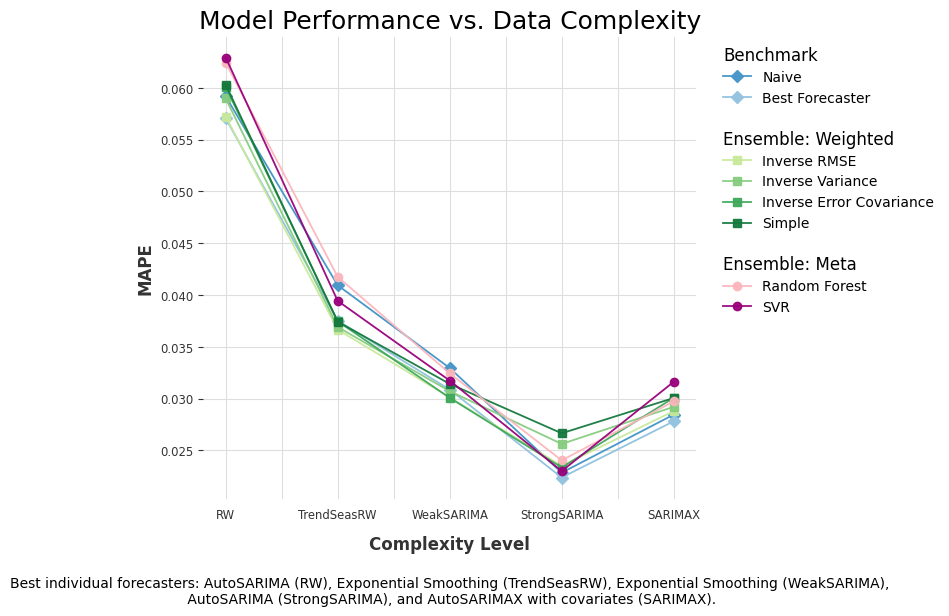

In [15]:
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"]
plot_metrics(
    metric="MAPE", 
    sort_labels=file_names,
    export=True)